In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sb

import astropy.coordinates as coord
from astropy import units as u

%matplotlib inline

pd.set_option("display.max_rows", None, "display.max_columns", None)
sb.set(context='talk', style='whitegrid', palette='Set1')

In [2]:
targetspath = os.path.join(os.getcwd(), 'TESStargets.csv')
targets = pd.read_csv(targetspath)

TESStoiPath = os.path.join(os.getcwd(), 'TESS-toi.csv')
TESStoi = pd.read_csv(TESStoiPath)

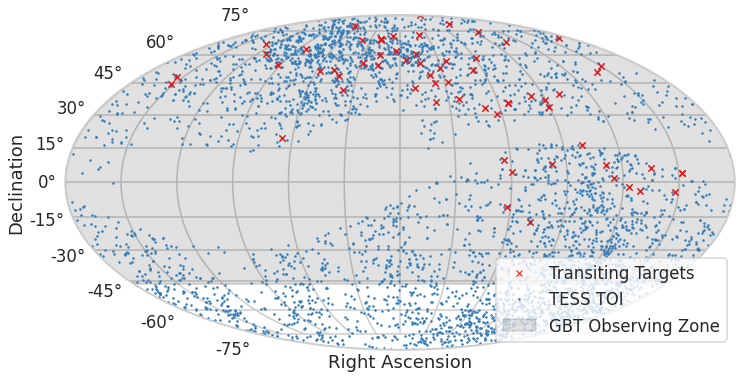

In [3]:
#coords = SkyCoord(targets['ra_hrs'], targets['dec_deg'], unit=(u.hourangle, u.deg))
#TESScoords = SkyCoord(TESStoi['RA'], TESStoi['Dec'], unit=(u.hourangle, u.deg))

a = 0.12
ms = 3

targetRA = coord.Angle(targets['ra_hrs'], unit=u.hourangle)
targetDec = coord.Angle(targets['dec_deg'], unit=u.deg)
tessRA = coord.Angle(TESStoi['RA'], unit=u.hourangle)
tessDec = coord.Angle(TESStoi['Dec'], unit=u.deg)

targetRA = targetRA.wrap_at(180*u.deg)
tessRA = tessRA.wrap_at(180*u.deg)

line1 = np.pi/2
midline = np.linspace(-np.pi, np.pi)
line2 = -46*np.pi/180

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="mollweide")

ax.fill_between(midline, line1, line2, color='k', alpha=a, label='GBT Observing Zone')

ax.plot(targetRA.radian, targetDec.radian, 'x', label='Transiting Targets', zorder=2, markersize=ms*2)
ax.plot(tessRA.radian, tessDec.radian, '.', label='TESS TOI', zorder=1, markersize=ms)


#ax.grid()
ax.set_xticklabels([])
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
_=ax.legend(loc='lower right')

66 Full Cadences
1 Partial Cadences


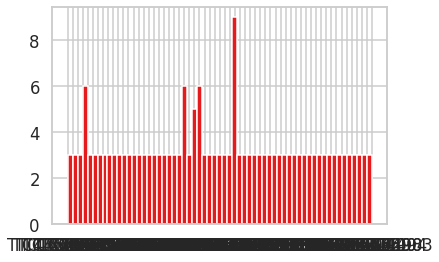

In [47]:
def countCadences(names):
    counts, bins, bars = plt.hist(names, bins=61);

    numCad = 0
    numPartCad = 0
    for count in counts:
        if count%3 == 0:
            numCad += count/3
        else:
            numCad += np.floor(count/3)
            numPartCad += 1

    print(f'{int(numCad)} Full Cadences\n{numPartCad} Partial Cadences')

names = targets['target_name'].to_numpy()
countCadences(names)

In [65]:
fileinfo = pd.read_csv('/home/ubuntu/Documents/BL-TESSsearch/run-turboSETI/target-file-info.csv')
target_names = fileinfo['TARGET NAME'].to_numpy()
ticTargs = []
for name in target_names:
    if name[:3] == 'TIC':
        ticTargs.append(name)
#countCadences(ticTargs)

In [64]:
missTargs = []

ticTargs = np.array(ticTargs)

for name in np.unique(names):
    whereName = np.where(name == ticTargs)[0]
    if len(whereName) == 0:
        missTargs.append(name)

print(f'I originally found {len(np.unique(names))} unique TIC targets')
print(f'There are {len(np.unique(ticTargs))} unique TIC targets in the files list')
print(f'The missing TIC targets are {missTargs}')

I originally found 61 unique TIC targets
There are 55 unique TIC targets in the files list
The missing TIC targets are ['TIC129979528', 'TIC149833117', 'TIC198212955', 'TIC272625214', 'TIC294471966', 'TIC458478250']
